# Tweet classification: Trump vs. Trudeau

# 1. Import the libraries

- Note : use a specific random state for your solution.

In [40]:
import numpy as np
import pandas as pd
from sklearn import datasets, svm, model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# 2. Read the dataset

In [2]:
df=pd.read_csv('tweets.csv')
df.head()

,id,author,status
0,1,Donald J. Trump,I will be making a major statement from the @W...
1,2,Donald J. Trump,Just arrived at #ASEAN50 in the Philippines fo...
2,3,Donald J. Trump,"After my tour of Asia, all Countries dealing w..."
3,4,Donald J. Trump,Great to see @RandPaul looking well and back o...
4,5,Donald J. Trump,Excited to be heading home to see the House pa...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      400 non-null    int64 
 1   author  400 non-null    object
 2   status  400 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


In [5]:
df['author'].value_counts()

Donald J. Trump    200
Justin Trudeau     200
Name: author, dtype: int64

# 3. Split the dataset into X and y

In [3]:
X=df['status']
y=df['author']

# 4. Split the dataset into training set and testing set

In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 23)

# 5. Vectorize the tweets

- Note : Read about CountVectorizer and TfidfVectorizer methods and use them in training and testing dataset.

In [9]:
vectorizer = CountVectorizer()

trainvect=vectorizer.fit_transform(X_train) 
testvect=vectorizer.transform(X_test)

tfidf=TfidfVectorizer()
traintfid=tfidf.fit_transform(X_train)
testfid=tfidf.transform(X_test)

# 6. Train a Logistic Regression model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [10]:
#tfidf 
lregtfidf = LogisticRegression()
LRtfidf=lregtfidf.fit(traintfid, y_train)

#count vectorize
lregcount = LogisticRegression()
LRcv=lregcount.fit(trainvect, y_train)

# 7. Train a SVM model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [11]:
#tfidf 
svmt= svm.SVC()
svmtfidf=svmt.fit(traintfid, y_train)

#vectorize
svmv = svm.SVC()
svmcv=svmv.fit(trainvect, y_train)

# 8. Make a prediction and calculate the score for both Logistic Regression and SVM

In [17]:
# Logistic Regression TfidfVectorizer
predictions = LRtfidf.predict(testfid)
print('Logistic Regression TfidfVectorizer',accuracy_score(y_test,predictions))

Logistic Regression TfidfVectorizer 0.82


In [18]:
# Logistic Regression count vectorize
predictions = LRcv.predict(testvect)
print('Logistic Regression count vectorize',accuracy_score(y_test,predictions))

Logistic Regression count vectorize 0.88


In [19]:
# SVM TfidfVectorizer
predictions = svmtfidf.predict(testfid)
print('SVM TfidfVectorizer',accuracy_score(y_test,predictions))

SVM TfidfVectorizer 0.86


In [20]:
# SVM count vectorize
predictions = svmcv.predict(testvect)
print('SVM count vectorize',accuracy_score(y_test,predictions))

SVM count vectorize 0.82


# 9. Plot a confusion matrix for both Logistic Regression and SVM

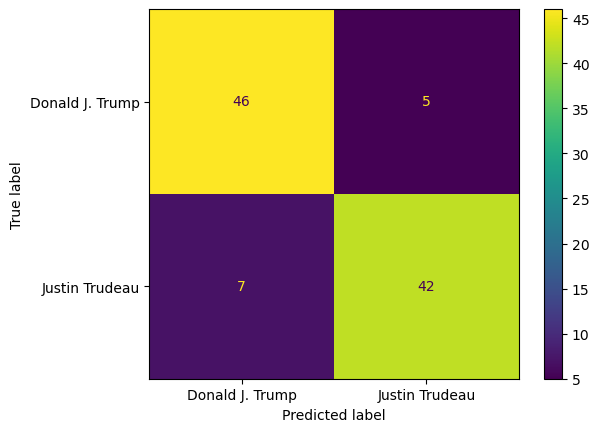

In [41]:
## Logistic Regression count vectorize
plot_confusion_matrix(LRcv, testvect, y_test)

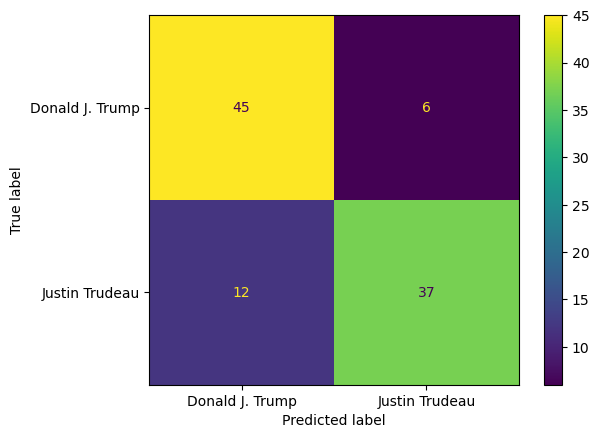

In [42]:
# Logistic Regression TfidfVectorizer
plot_confusion_matrix(LRtfidf, testfid, y_test);

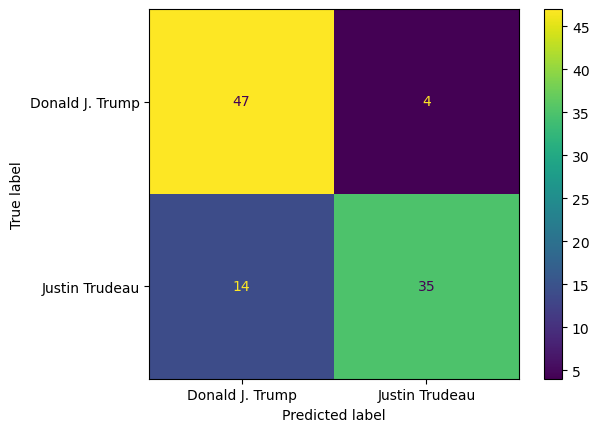

In [43]:
## SVM count vectorize
plot_confusion_matrix(svmcv, testvect, y_test)

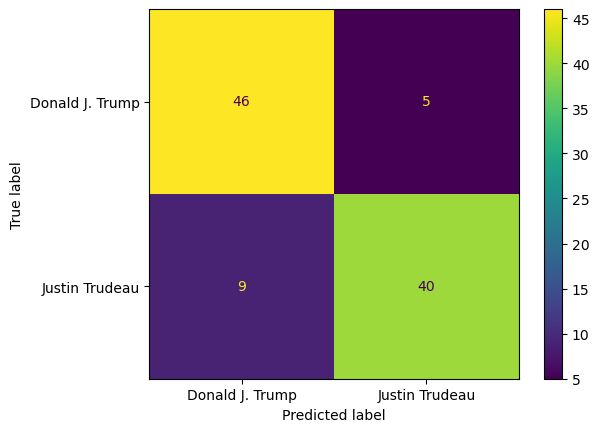

In [44]:
# SVM TfidfVectorizer
plot_confusion_matrix(svmtfidf, testfid, y_test);